In [1]:
#DATA CAPSTONE PROJECT 911!
print("HHM19")

HHM19


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')
(df.head())

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
#TOP 5 ZIP CODES
df['zip'].value_counts().head(5)

#OB1

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
#What are the top 5 townships (twp) for 911 calls? 
df['twp'].value_counts().head(5)

#OB2

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [10]:
#Take a look at the 'title' column, how many unique title codes are there? 
df['title'].nunique()

110

In [7]:
'''
In the titles column there are "Reasons/Departments" specified before the title code. 
These are EMS, Fire, and Traffic.
Use .apply() with a custom lambda expression to create a new column called "Reason"
that contains this string value. 
For example, if the title column value is EMS: BACK PAINS/INJURY , 
the Reason column value would be EMS. 
'''
#reason = lambda word: word.split(':')[0]
#print(reason('EMS: BACK PAINS/INJURY'))

df['Reason'] = df['title'].apply(lambda word: word.split(':')[0])
#df['Reason']

In [8]:
#What is the most common Reason for a 911 call based off of this new column? 
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

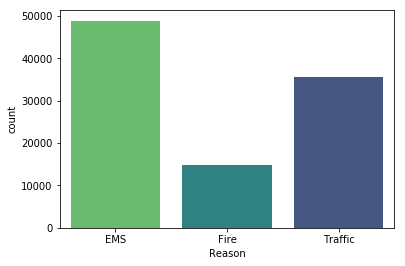

In [9]:
#Now use seaborn to create a countplot of 911 calls by Reason. 
sns.countplot(df['Reason'], palette = 'viridis_r')
#OB-3

In [14]:
#Now let us begin to focus on time information. 
#What is the data type of the objects in the timeStamp column? 

type(df['timeStamp'].iloc[1])

str

In [10]:
'''
You should have seen that these timestamps are still strings.
Use pd.to_datetime to convert the column from strings to DateTime objects.
'''
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
'''
You can now grab specific attributes from a Datetime object by calling them. For example:
'''
time = df['timeStamp'].iloc[0]
#time, time.hour, time.month, 
time.weekday_name

C:\Users\Venkat\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


'Thursday'

In [21]:
'''
You can use Jupyter's tab method to explore the various attributes you can call.
Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns 
called Hour, Month, and Day of Week.
You will create these columns based off of the timeStamp column,
reference the solutions if you get stuck on this step.
'''
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
#df['Hour']

df['Month'] = df['timeStamp'].apply(lambda time: time.month)
#df['Month']

df['Day_Of_Week'] = df['timeStamp'].apply(lambda time: time.weekday_name)
#df['Day_Of_Week']


C:\Users\Venkat\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


In [22]:
'''
Notice how the Day of Week is an integer 0-6.
Use the .map() with this dictionary to map the actual string names to the day of the week: 


dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day_Of_Week'] = df['Day_Of_Week'].map(dmap)
'''

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_Of_Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday


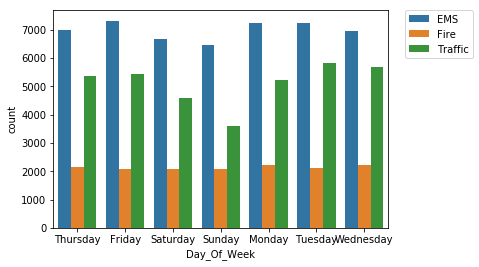

In [19]:
'''
Now use seaborn to create a countplot of the Day of Week column 
with the hue based off of the Reason column. 
'''

sns.countplot(x = 'Day_Of_Week', hue = 'Reason', data = df)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

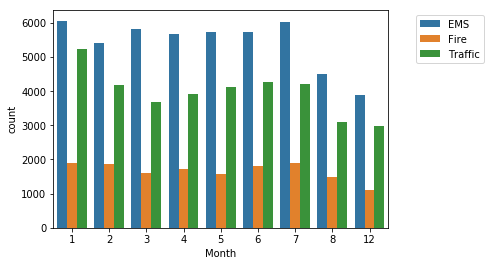

In [20]:
sns.countplot(x = 'Month', hue = 'Reason', data = df)
plt.legend(bbox_to_anchor = (1.3, 1))

In [21]:
'''
You should have noticed it was missing some Months,
let's see if we can maybe fill in this information by plotting the information in another way,
possibly a simple line plot that fills in the missing months,
in order to do this, we'll need to do some work with pandas... 

Now create a gropuby object called byMonth,
where you group the DataFrame by the month column 
and use the count() method for aggregation.
Use the head() method on this returned DataFrame. 
'''

byMonth = df.groupby("Month").count()
#byMonth.count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_Of_Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


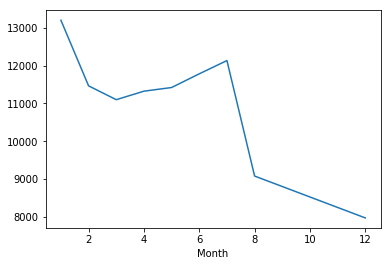

In [22]:
#Now create a simple plot off of the dataframe indicating the count of calls per month. 

#Whats a simple plot??

byMonth['lat'].plot()

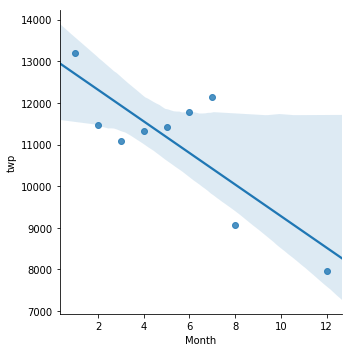

In [23]:
#Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month.
#Keep in mind you may need to reset the index to a column. 

byMonth = byMonth.reset_index()
sns.lmplot(x = 'Month', y = 'twp', data = byMonth)

In [47]:
'''
Create a new column called 'Date' that contains the date from the timeStamp column.
You'll need to use apply along with the .date() method. 
'''

time = df['timeStamp'].iloc[0]
#time
#time.hour 
#time.month
#time.weekday_name
time.date

df['Date'] = df['timeStamp'].apply(lambda time: time.date())

<function matplotlib.pyplot.tight_layout>

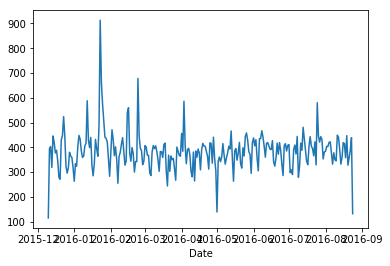

In [63]:
#Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

datedf = df.groupby('Date').count()
datedf['twp'].plot()
plt.tight_layout
#sns.countplot(x = 'Hour', data = datedf)

#OB-4 

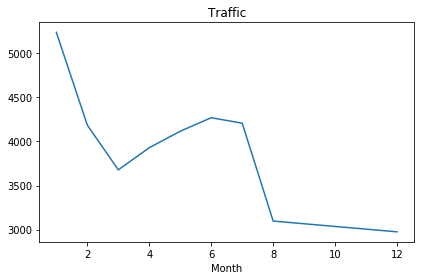

In [69]:
#Now recreate this plot but create 3 separate plots 
#with each plot representing a Reason for the 911 call
df[df['Reason'] == 'Traffic'].groupby('Month').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

#OB-5

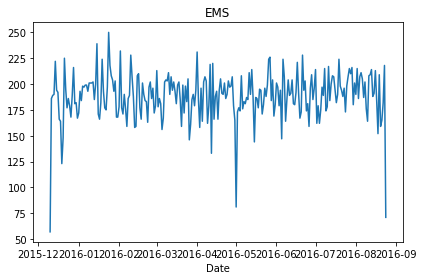

In [68]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

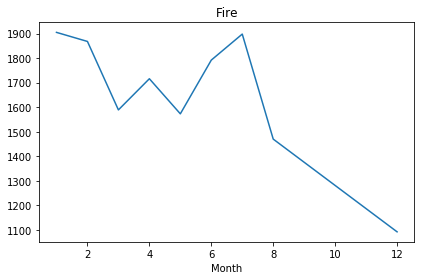

In [71]:
df[df['Reason'] == 'Fire'].groupby('Month').count()['twp'].plot()    
plt.title('Fire')
plt.tight_layout()

#OB-6

In [84]:
'''
Now let's move on to creating heatmaps with seaborn and our data.
We'll first need to restructure the dataframe so that the columns
become the Hours and the Index becomes the Day of the Week.
There are lots of ways to do this,
but I would recommend trying to combine groupby with an unstack method.
'''
dayHour = df.groupby(by = ['Day_Of_Week', 'Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_Of_Week,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


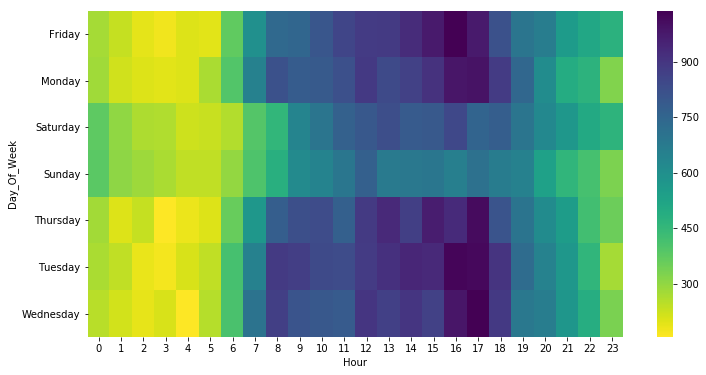

In [114]:
#Now create a HeatMap using this new DataFrame. 
plt.figure(figsize=(12, 6))
sns.heatmap(dayHour, cmap = 'viridis_r')

#OBOBOBOBOB

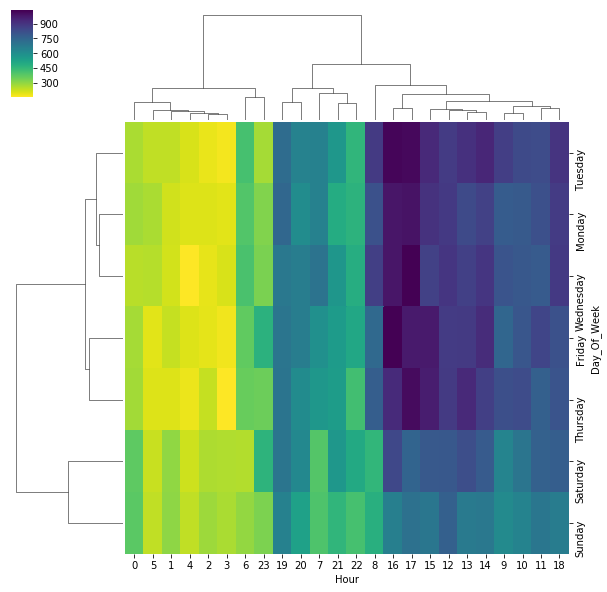

In [101]:
#Now create a clustermap using this DataFrame. 
sns.clustermap(dayHour, cmap = 'viridis_r')

In [104]:
#Now repeat these same plots and operations,
#for a DataFrame that shows the Month as the column. 

dayMonth = df.groupby(by = ['Day_Of_Week','Month']).count()['Reason'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day_Of_Week,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tuesday,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wednesday,1700,1903,1889,1517,1538,2058,1717,1295,1262


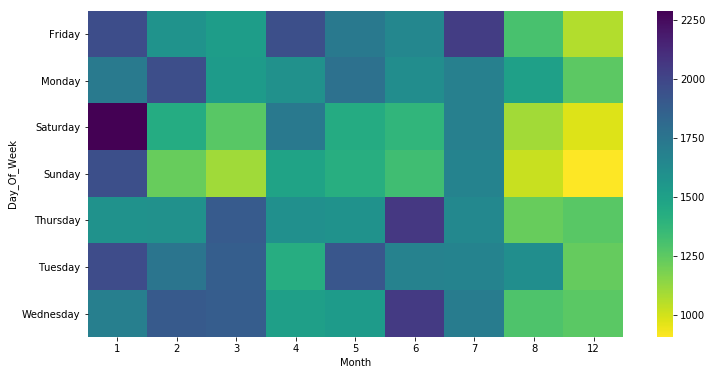

In [112]:
#Now create a HeatMap using this new DataFrame.
plt.figure(figsize=(12, 6))
sns.heatmap(dayMonth, cmap = 'viridis_r')

<Figure size 864x432 with 0 Axes>

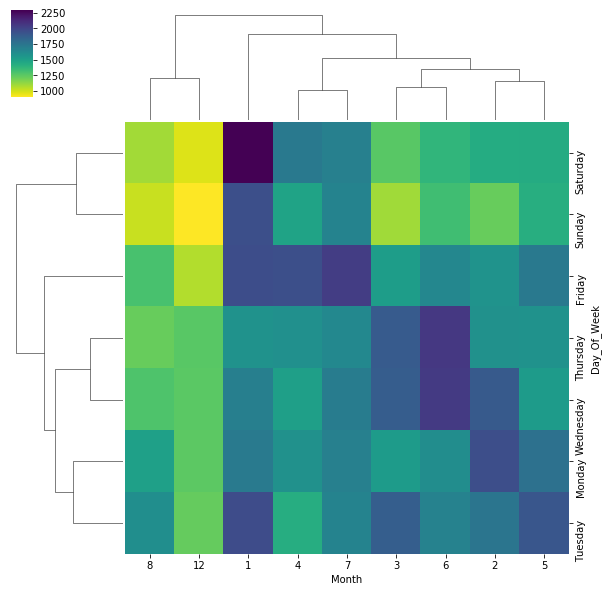

In [113]:
#Now create a clustermap using this DataFrame.
plt.figure(figsize= (12, 6))
sns.clustermap(dayMonth, cmap = 'viridis_r')